# Unit 5 - Financial Planning

In [27]:
# Initial imports
import os
import requests
import json
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from matplotlib import pyplot as plt
from MCForecastTools import MCSimulation

%matplotlib inline

In [ ]:
# Load .env enviroment variables
load_dotenv()

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [ ]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [ ]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
my_btc_resp = requests.get(btc_url)
my_btc_data = my_btc_resp.json()
print(json.dumps(my_btc_data, indent=4))
BTC = my_btc_data['data']['1']['quotes']['CAD']['price']
# Fetch current ETH price
# YOUR CODE HERE!
my_eth_resp = requests.get(eth_url)
my_eth_data = my_eth_resp.json()
print(json.dumps(my_eth_data, indent=4))
ETH = my_eth_data['data']['1027']['quotes']['CAD']['price']
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * BTC
my_eth_value = my_eth * ETH
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18995550,
            "total_supply": 18995550,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 44806.0,
                    "volume_24h": 15433207039,
                    "market_cap": 851146772373,
                    "percentage_change_1h": -0.0159847919844519,
                    "percentage_change_24h": 1.0267828666364,
                    "percentage_change_7d": 6.1701683665487,
                    "percent_change_1h": -0.0159847919844519,
                    "percent_change_24h": 1.0267828666364,
                    "percent_change_7d": 6.1701683665487
                },
                "CAD": {
                    "price": 55922.3686,
                    "volume_24h": 19262185705.3759,
                    "ma

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
# lastbusday_obj = datetime.datetime.today()-BDay(1)
# lastbusday_str = datetime.datetime.strptime(str(lastbusday_obj),'%Y-%m-%d %H:%M:%S')

start_date = pd.Timestamp("2022-03-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-03-25", tz="America/New_York").isoformat()

ticker_data = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = ticker_data[ticker_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = ticker_data[ticker_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
ticker_data = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])
# Preview DataFrame
# YOUR CODE HERE!
ticker_data.head()

AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2022-03-21 04:00:00+00:00  107.58  107.649  106.9841  107.04   7583668   
2022-03-22 04:00:00+00:00  106.74  106.880  106.6100  106.75  16048681   
2022-03-23 04:00:00+00:00  106.96  107.210  106.7105  107.19   8567200   
2022-03-24 04:00:00+00:00  106.72  107.035  106.6500  106.95   7378690   
2022-03-25 04:00:00+00:00  106.65  106.650  105.9750  106.10  10295813   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-03-21 04:00:00+00:00       27316  107.310151  444.45  446.46  440.68   
2022-03-22 04:00:00+00:00       51796  106.746967  445.99  450.58  445.86   
2022-03-23 04:00:00+00:00       27348  106.991875  446.90  448.49  443.71   
2022-03-24 04:00:00+00:00       23320  106.879605  445.82  450.50  444.76   
2022-03-25 04:00:00+00:00       37569  106.190724  451.09  452.98  448.43   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-03-21 04:00:00+00:00  444.30  85377983      912432  443.796432  
2022-03-22 04:00:00+00:00  449.59  73674202      623610  448.558595  
2022-03-23 04:00:00+00:00  443.80  77982935      627281  446.058683  
2022-03-24 04:00:00+00:00  450.48  61411569      526865  447.609014  
2022-03-25 04:00:00+00:00  452.69  77199328      661033  451.047221

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = ticker_data["AGG"]["close"][-1]
spy_close_price = ticker_data["SPY"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.1
Current SPY closing price: $452.69


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22634.50
The current value of your 200 AGG shares is $21220.00


### Savings Health Analysis

In [17]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame([crypto_value, shares_value], columns=['amount'], index=['crypto','shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,88115.661552
shares,43854.500000


([<matplotlib.patches.Wedge at 0x7fde7f5d93d0>,
 [Text(-0.5530712634400546, 0.9508481359064769, 'crypto'),
  Text(0.5530714414897, -0.9508480323419225, 'shares')])

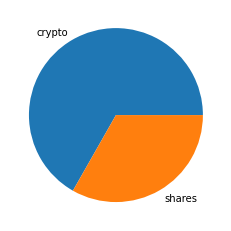

In [15]:
# Plot savings pie chart
# YOUR CODE HERE!
plt.pie(df_savings['amount'],labels = ['crypto','shares'])

In [24]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = np.sum(df_savings['amount'])
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congrat!! you have enough money in the fund")
elif total_savings == emergency_fund:
    print("You've reached this financial goal")
else:
    print(f"You're {total_savings-emergency_fund} away from reaching the goal")
    

Congrat!! you have enough money in the fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [25]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

ticker_data = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = ticker_data[ticker_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = ticker_data[ticker_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])
# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2022-03-21 04:00:00+00:00  107.58  107.649  106.9841  107.04   7583668   
2022-03-22 04:00:00+00:00  106.74  106.880  106.6100  106.75  16048681   
2022-03-23 04:00:00+00:00  106.96  107.210  106.7105  107.19   8567200   
2022-03-24 04:00:00+00:00  106.72  107.035  106.6500  106.95   7378690   
2022-03-25 04:00:00+00:00  106.65  106.650  105.9750  106.10  10295813   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-03-21 04:00:00+00:00       27316  107.310151  444.45  446.46  440.68   
2022-03-22 04:00:00+00:00       51796  106.746967  445.99  450.58  445.86   
2022-03-23 04:00:00+00:00       27348  106.991875  446.90  448.49  443.71   
2022-03-24 04:00:00+00:00       23320  106.879605  445.82  450.50  444.76   
2022-03-25 04:00:00+00:00       37569  106.190724  451.09  452.98  448.43   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-03-21 04:00:00+00:00  444.30  85377983      912432  443.796432  
2022-03-22 04:00:00+00:00  449.59  73674202      623610  448.558595  
2022-03-23 04:00:00+00:00  443.80  77982935      627281  446.058683  
2022-03-24 04:00:00+00:00  450.48  61411569      526865  447.609014  
2022-03-25 04:00:00+00:00  452.69  77199328      661033  451.047221

In [28]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_stkbond_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.6,0.4],
    num_simulation = 500,
    num_trading_days = 252*30
)



In [30]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_stkbond_dist.portfolio_data.head()

AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2022-03-21 04:00:00+00:00  107.58  107.649  106.9841  107.04   7583668   
2022-03-22 04:00:00+00:00  106.74  106.880  106.6100  106.75  16048681   
2022-03-23 04:00:00+00:00  106.96  107.210  106.7105  107.19   8567200   
2022-03-24 04:00:00+00:00  106.72  107.035  106.6500  106.95   7378690   
2022-03-25 04:00:00+00:00  106.65  106.650  105.9750  106.10  10295813   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2022-03-21 04:00:00+00:00       27316  107.310151          NaN  444.45   
2022-03-22 04:00:00+00:00       51796  106.746967    -0.002709  445.99   
2022-03-23 04:00:00+00:00       27348  106.991875     0.004122  446.90   
2022-03-24 04:00:00+00:00       23320  106.879605    -0.002239  445.82   
2022-03-25 04:00:00+00:00       37569  106.190724    -0.007948  451.09   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2022-03-21 04:00:00+00:00  446.46  440.68  444.30  85377983      912432   
2022-03-22 04:00:00+00:00  450.58  445.86  449.59  73674202      623610   
2022-03-23 04:00:00+00:00  448.49  443.71  443.80  77982935      627281   
2022-03-24 04:00:00+00:00  450.50  444.76  450.48  61411569      526865   
2022-03-25 04:00:00+00:00  452.98  448.43  452.69  77199328      661033   

                                                    
                                 vwap daily_return  
timestamp                                           
2022-03-21 04:00:00+00:00  443.796432          NaN  
2022-03-22 04:00:00+00:00  448.558595     0.011906  
2022-03-23 04:00:00+00:00  446.058683    -0.012878  
2022-03-24 04:00:00+00:00  447.609014     0.015052  
2022-03-25 04:00:00+00:00  451.047221     0.004906

In [31]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_stkbond_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 110.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 120.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 130.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 140.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 150.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 160.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 170.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 180.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 190.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 200.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 210.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 220.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 230.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 240.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 250.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 260.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 270.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 280.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 290.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 300.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 310.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 320.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 330.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 340.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 350.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 360.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 370.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 380.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 390.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 400.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 410.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 420.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 430.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 440.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 450.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 460.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 470.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 480.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

Running Monte Carlo simulation number 490.


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994743,1.002654,1.006424,0.997308,1.011598,0.997728,0.996753,1.016287,0.997528,0.999942,...,1.007577,1.005553,1.004521,1.008640,0.996722,0.993490,1.011600,1.005929,1.007792,1.011424
2,0.987096,0.996513,1.001760,0.989909,1.016717,0.995346,0.998043,1.016763,0.989298,0.998431,...,1.004884,0.999387,0.992580,1.007983,1.003526,0.997275,1.011063,1.003299,1.004114,1.014253
3,0.981345,0.995090,1.002305,0.986262,1.001029,0.993106,1.002846,1.024035,0.990862,1.000882,...,0.994528,0.989458,0.995877,1.004370,1.004142,1.008078,1.019675,0.998236,1.001504,1.002545
4,0.980288,0.997456,0.998743,0.993113,1.001132,0.992090,1.005683,1.021987,0.990372,1.005703,...,0.991821,0.988321,0.995152,1.002793,0.998524,1.005989,1.022057,1.007890,0.997172,0.999016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,49.729295,54.280953,39.883493,121.429254,151.374720,42.657582,66.748885,91.981712,100.585324,66.923579,...,29.062300,56.064996,134.462702,72.553042,65.286913,93.507527,54.997465,96.238546,125.965205,27.681857
7557,49.382056,54.275691,39.567856,120.655686,151.064163,42.499030,66.222393,92.578597,100.940805,67.074097,...,29.079358,56.364319,134.927260,72.625881,65.332671,94.068793,55.184742,96.578904,125.935588,27.629066
7558,49.920052,54.153602,39.658548,120.072119,150.295837,42.141978,65.533697,93.402909,101.106677,67.386832,...,28.962424,57.082625,134.691502,72.431358,65.069171,93.785868,55.071709,96.934977,126.661232,27.777329
7559,50.437775,54.189829,39.925172,119.874535,148.650755,42.380512,65.767972,93.142159,101.453865,67.917356,...,29.270305,57.328478,137.331636,72.587713,64.902556,94.146789,55.339617,97.191268,125.712564,27.698039


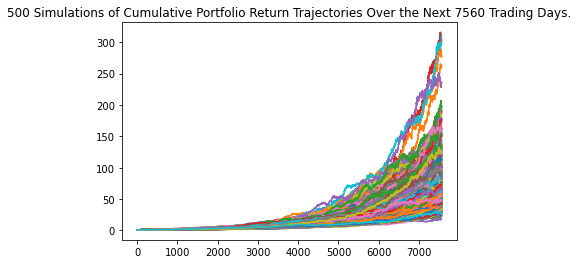

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_stkbond_dist.plot_simulation()

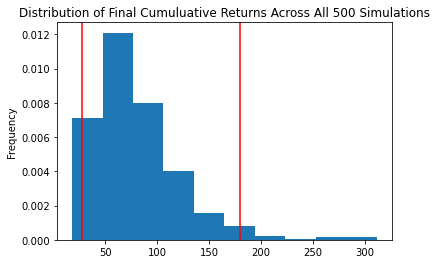

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_stkbond_dist.plot_distribution()

### Retirement Analysis

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

stkbond_tbl = MC_stkbond_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(stkbond_tbl)

count           500.000000
mean             80.489948
std              41.673216
min              18.090457
25%              52.333034
50%              72.139220
75%              99.153451
max             310.843242
95% CI Lower     27.991464
95% CI Upper    179.066163
Name: 7560, dtype: float64


/Users/hannahtudo/opt/anaconda3/UTOR-VIRT-FIN-PT-02-2022-U-LOL/Homeworks/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $559829.29 and $3581323.26


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_stkbond_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.6,0.4],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_stkbond_dist.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_stkbond_dist.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_stkbond_dist.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stkbond_tbl = MC_stkbond_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(stkbond_tbl)

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")